In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/dataset-resized'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/dataset-resized/paper/paper105.jpg
/content/drive/MyDrive/dataset-resized/paper/paper106.jpg
/content/drive/MyDrive/dataset-resized/paper/paper114.jpg
/content/drive/MyDrive/dataset-resized/paper/paper1.jpg
/content/drive/MyDrive/dataset-resized/paper/paper107.jpg
/content/drive/MyDrive/dataset-resized/paper/paper110.jpg
/content/drive/MyDrive/dataset-resized/paper/paper10.jpg
/content/drive/MyDrive/dataset-resized/paper/paper100.jpg
/content/drive/MyDrive/dataset-resized/paper/paper115.jpg
/content/drive/MyDrive/dataset-resized/paper/paper113.jpg
/content/drive/MyDrive/dataset-resized/paper/paper112.jpg
/content/drive/MyDrive/dataset-resized/paper/paper101.jpg
/content/drive/MyDrive/dataset-resized/paper/paper11.jpg
/content/drive/MyDrive/dataset-resized/paper/paper109.jpg
/content/drive/MyDrive/dataset-resized/paper/paper102.jpg
/content/drive/MyDrive/dataset-resized/paper/paper104.jpg
/content/drive/MyDrive/dataset-resized/paper/paper103.jpg
/content/drive/MyD

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Create Files_Name
image_data="/content/drive/MyDrive/dataset-resized"
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

Files_Name
0      paper
1      glass
2      trash
3    plastic
4  cardboard
5      metal

In [5]:
import tensorflow as tf

# Define parameters
train_data_dir = image_data
batch_size = 32
target_size = (224, 224)
validation_split = 0.1
test_split = 0.2

# Load the entire dataset
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

# Split the dataset into training and validation subsets
num_examples = full_dataset.cardinality().numpy()
train_size = int((1 - validation_split - test_split) * num_examples)
val_size = int(validation_split * num_examples)

train_dataset = full_dataset.take(train_size)
validation_dataset = full_dataset.skip(train_size).take(val_size)

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 2527 files belonging to 6 classes.
Using 2275 files for training.
Found 2527 files belonging to 6 classes.
Using 252 files for validation.


In [6]:
class_names = full_dataset.class_names
class_names

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

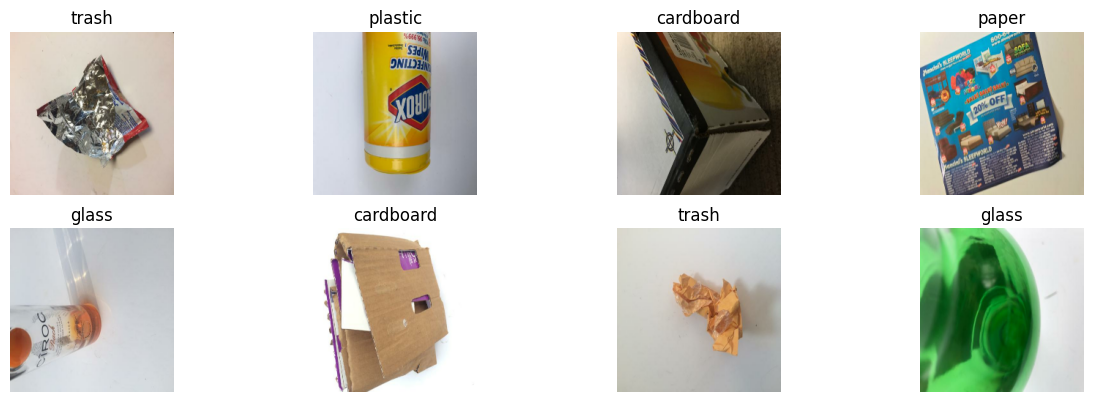

In [7]:
plt.figure(figsize=(15, 20))
for images, labels in train_dataset.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
import tensorflow as tf
from tensorflow import keras

# Define DenseNet121 with pre-trained weights
base_model = tf.keras.applications.DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Build the sequential model
keras_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(6, activation='softmax')
])

# Provide a sample input
sample_input = tf.random.normal((1, 224, 224, 3))

# Call the model with the sample input to initialize the shapes
_ = keras_model(sample_input)

# Print model summary
keras_model.summary()

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 6)                 6150      
                                                                 
Total params: 7043654 (26.87 MB)
Trainable params: 6150 (24.02 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [12]:
# Define callbacks
# Compile the model
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath='mobilenetv3_model.keras', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
hist = keras_model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[checkpoint, early_stopping])

Epoch 1/10
50/50 [==============================] - 770s 15s/step - loss: 4.0690 - accuracy: 0.2844 - val_loss: 2.1476 - val_accuracy: 0.3929
Epoch 2/10
50/50 [==============================] - 18s 345ms/step - loss: 1.8359 - accuracy: 0.4569 - val_loss: 1.7143 - val_accuracy: 0.4866
Epoch 3/10
50/50 [==============================] - 16s 312ms/step - loss: 1.3987 - accuracy: 0.5238 - val_loss: 1.4545 - val_accuracy: 0.5446
Epoch 4/10
50/50 [==============================] - 15s 280ms/step - loss: 1.1880 - accuracy: 0.5944 - val_loss: 1.3714 - val_accuracy: 0.5491
Epoch 5/10
50/50 [==============================] - 15s 293ms/step - loss: 1.0749 - accuracy: 0.6256 - val_loss: 1.2156 - val_accuracy: 0.6027
Epoch 6/10
50/50 [==============================] - 18s 355ms/step - loss: 0.9561 - accuracy: 0.6525 - val_loss: 0.9630 - val_accuracy: 0.6473
Epoch 7/10
50/50 [==============================] - 18s 341ms/step - loss: 0.9418 - accuracy: 0.6712 - val_loss: 1.2066 - val_accuracy: 0.6205


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define DenseNet121 with pre-trained weights
base_model = tf.keras.applications.DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Unfreeze some of the layers in the base model
fine_tune_at = 100  # Fine-tune from this layer onwards
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Build the sequential model
keras_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(6, activation='softmax')
])

# Provide a sample input
sample_input = tf.random.normal((1, 224, 224, 3))

# Call the model with the sample input to initialize the shapes
_ = keras_model(sample_input)

# Print model summary
keras_model.summary()

# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_finetuned.keras', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Compile the model
keras_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),  # Lower learning rate for fine-tuning
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Fine-tune the model
hist1 = keras_model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[checkpoint, early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 7043654 (26.87 MB)
Trainable params: 6155334 (23.48 MB)
Non-trainable params: 888320 (3.39 MB)
_________________________________________________________________


Epoch 1/10
50/50 [==============================] - 65s 438ms/step - loss: 1.0017 - accuracy: 0.6519 - val_loss: 87.1724 - val_accuracy: 0.1607
Epoch 2/10
50/50 [==============================] - 20s 391ms/step - loss: 0.5174 - accuracy: 0.8281 - val_loss: 8.3489 - val_accuracy: 0.3571
Epoch 3/10
50/50 [==============================] - 24s 462ms/step - loss: 0.3669 - accuracy: 0.8744 - val_loss: 3.6407 - val_accuracy: 0.5848
Epoch 4/10
50/50 [==============================] - 22s 406ms/step - loss: 0.2354 - accuracy: 0.9156 - val_loss: 1.0321 - val_accuracy: 0.7277
Epoch 5/10
50/50 [==============================] - 25s 491ms/step - loss: 0.2382 - accuracy: 0.9131 - val_loss: 0.9367 - val_accuracy: 0.8259
Epoch 6/10
50/50 [==============================] - 19s 350ms/step - loss: 0.1721 - accuracy: 0.9375 - val_loss: 0.7021 - val_accuracy: 0.8170
Epoch 7/10
50/50 [==============================] - 22s 431ms/step - loss: 0.2017 - accuracy: 0.9344 - val_loss: 1.1088 - val_accuracy: 0.772

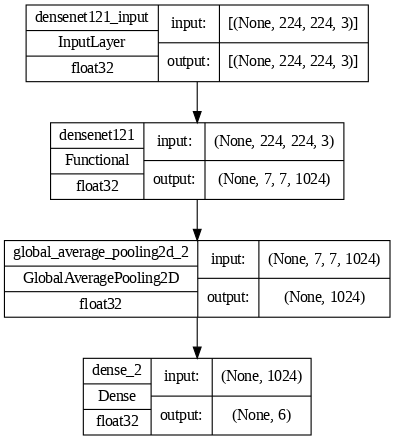

In [18]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)


In [20]:
hist_=pd.DataFrame(hist1.history)
hist_

loss  accuracy   val_loss  val_accuracy
0  1.001722  0.651875  87.172432      0.160714
1  0.517392  0.828125   8.348932      0.357143
2  0.366914  0.874375   3.640651      0.584821
3  0.235433  0.915625   1.032112      0.727679
4  0.238153  0.913125   0.936701      0.825893
5  0.172124  0.937500   0.702148      0.816964
6  0.201679  0.934375   1.108769      0.772321
7  0.105328  0.961875   0.355218      0.852679
8  0.096447  0.964375   1.029715      0.781250
9  0.093456  0.971875   0.364267      0.906250

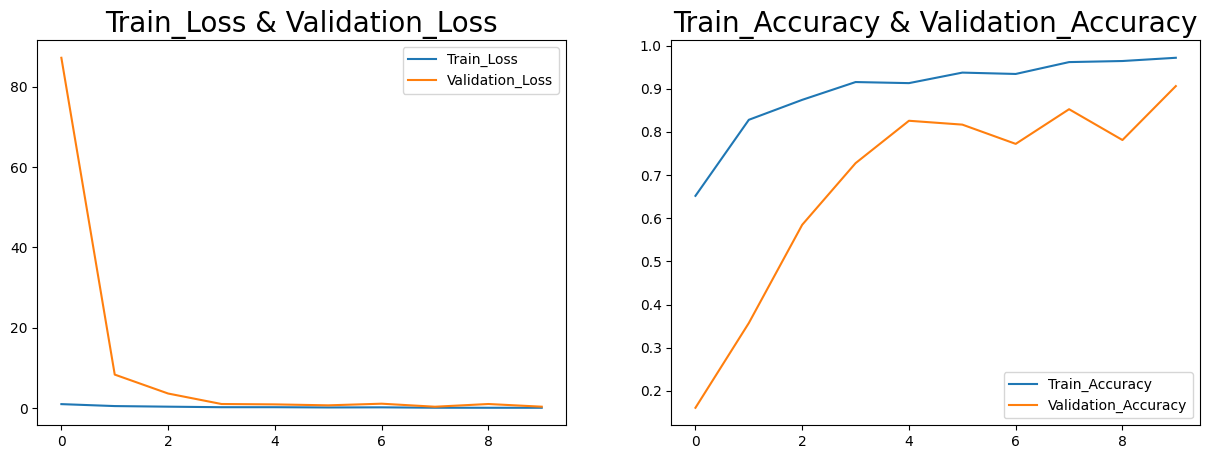

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [23]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation_dataset:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

7/7 [==============================] - 2s 95ms/step


Actual  Prediction
0         5           3
1         3           1
2         3           3
3         5           5
4         0           0
..      ...         ...
219       3           0
220       4           4
221       0           0
222       4           4
223       3           3

[224 rows x 2 columns]

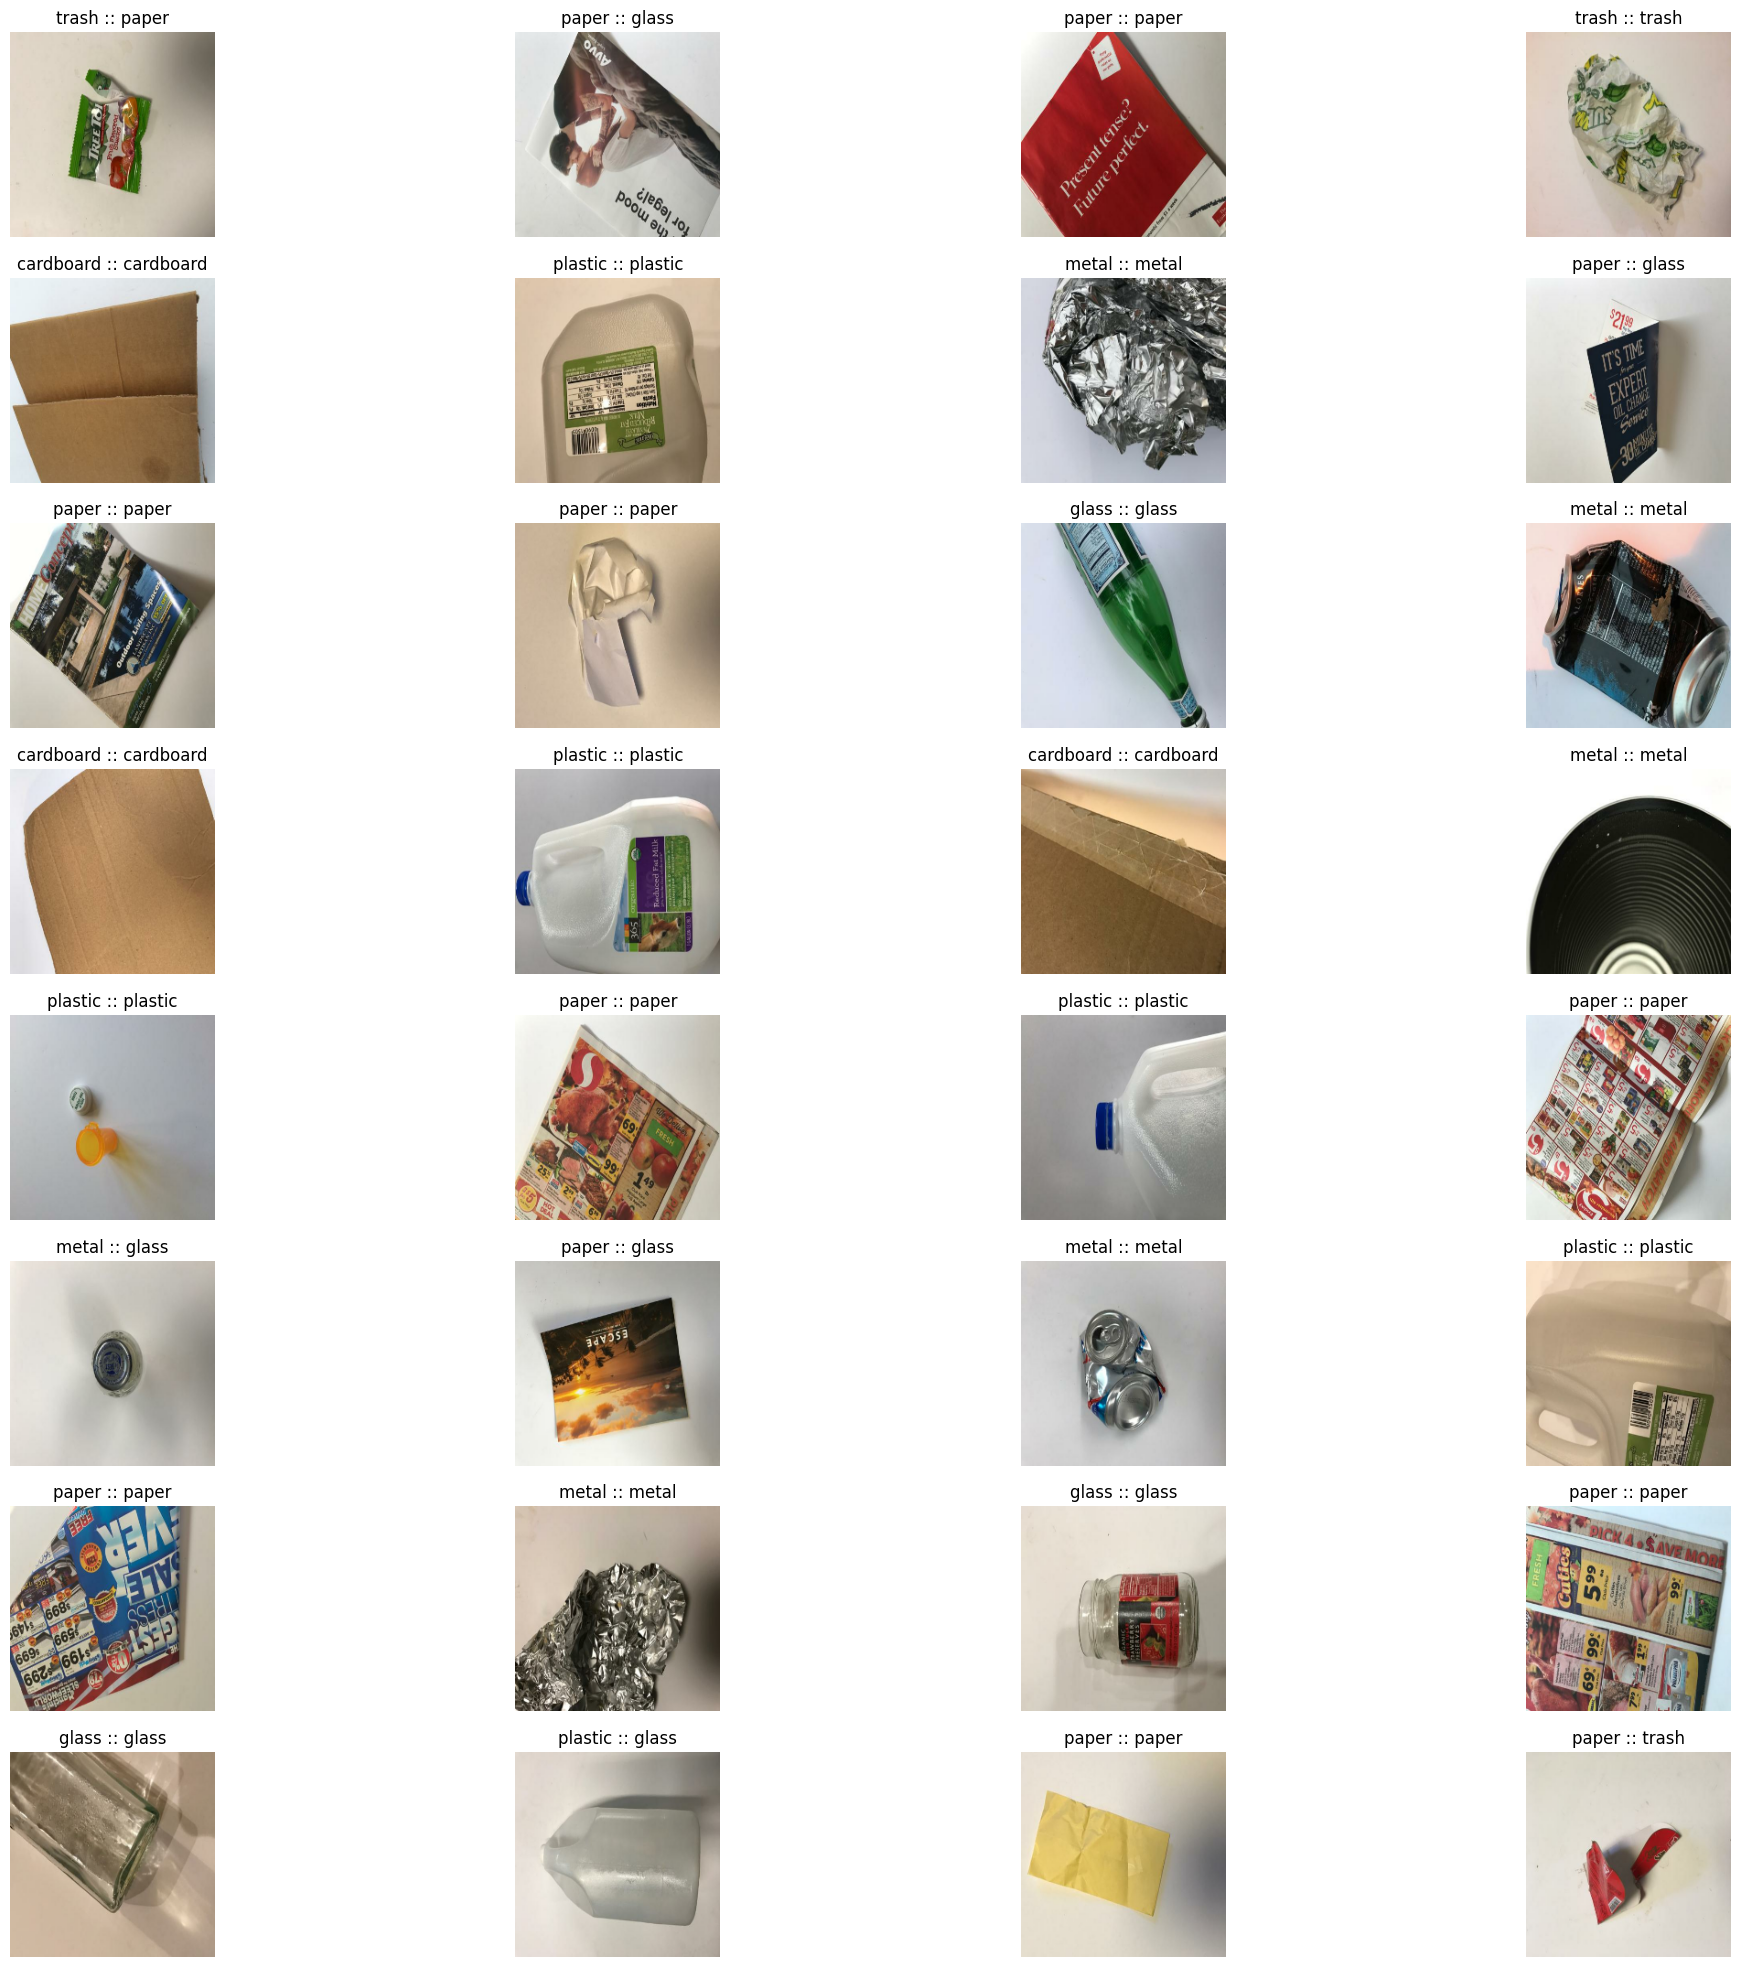

In [24]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f"Actual:{class_names[y_val[i]]} ::\nPredicted:{class_names[y_pred[i]]}')
    plt.axis("off")

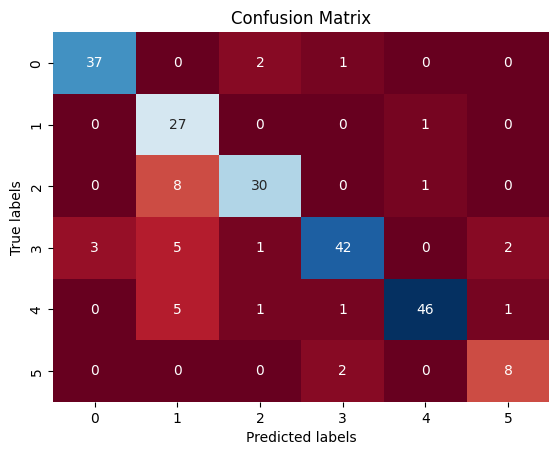

array([[37,  0,  2,  1,  0,  0],
       [ 0, 27,  0,  0,  1,  0],
       [ 0,  8, 30,  0,  1,  0],
       [ 3,  5,  1, 42,  0,  2],
       [ 0,  5,  1,  1, 46,  1],
       [ 0,  0,  0,  2,  0,  8]])

In [25]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

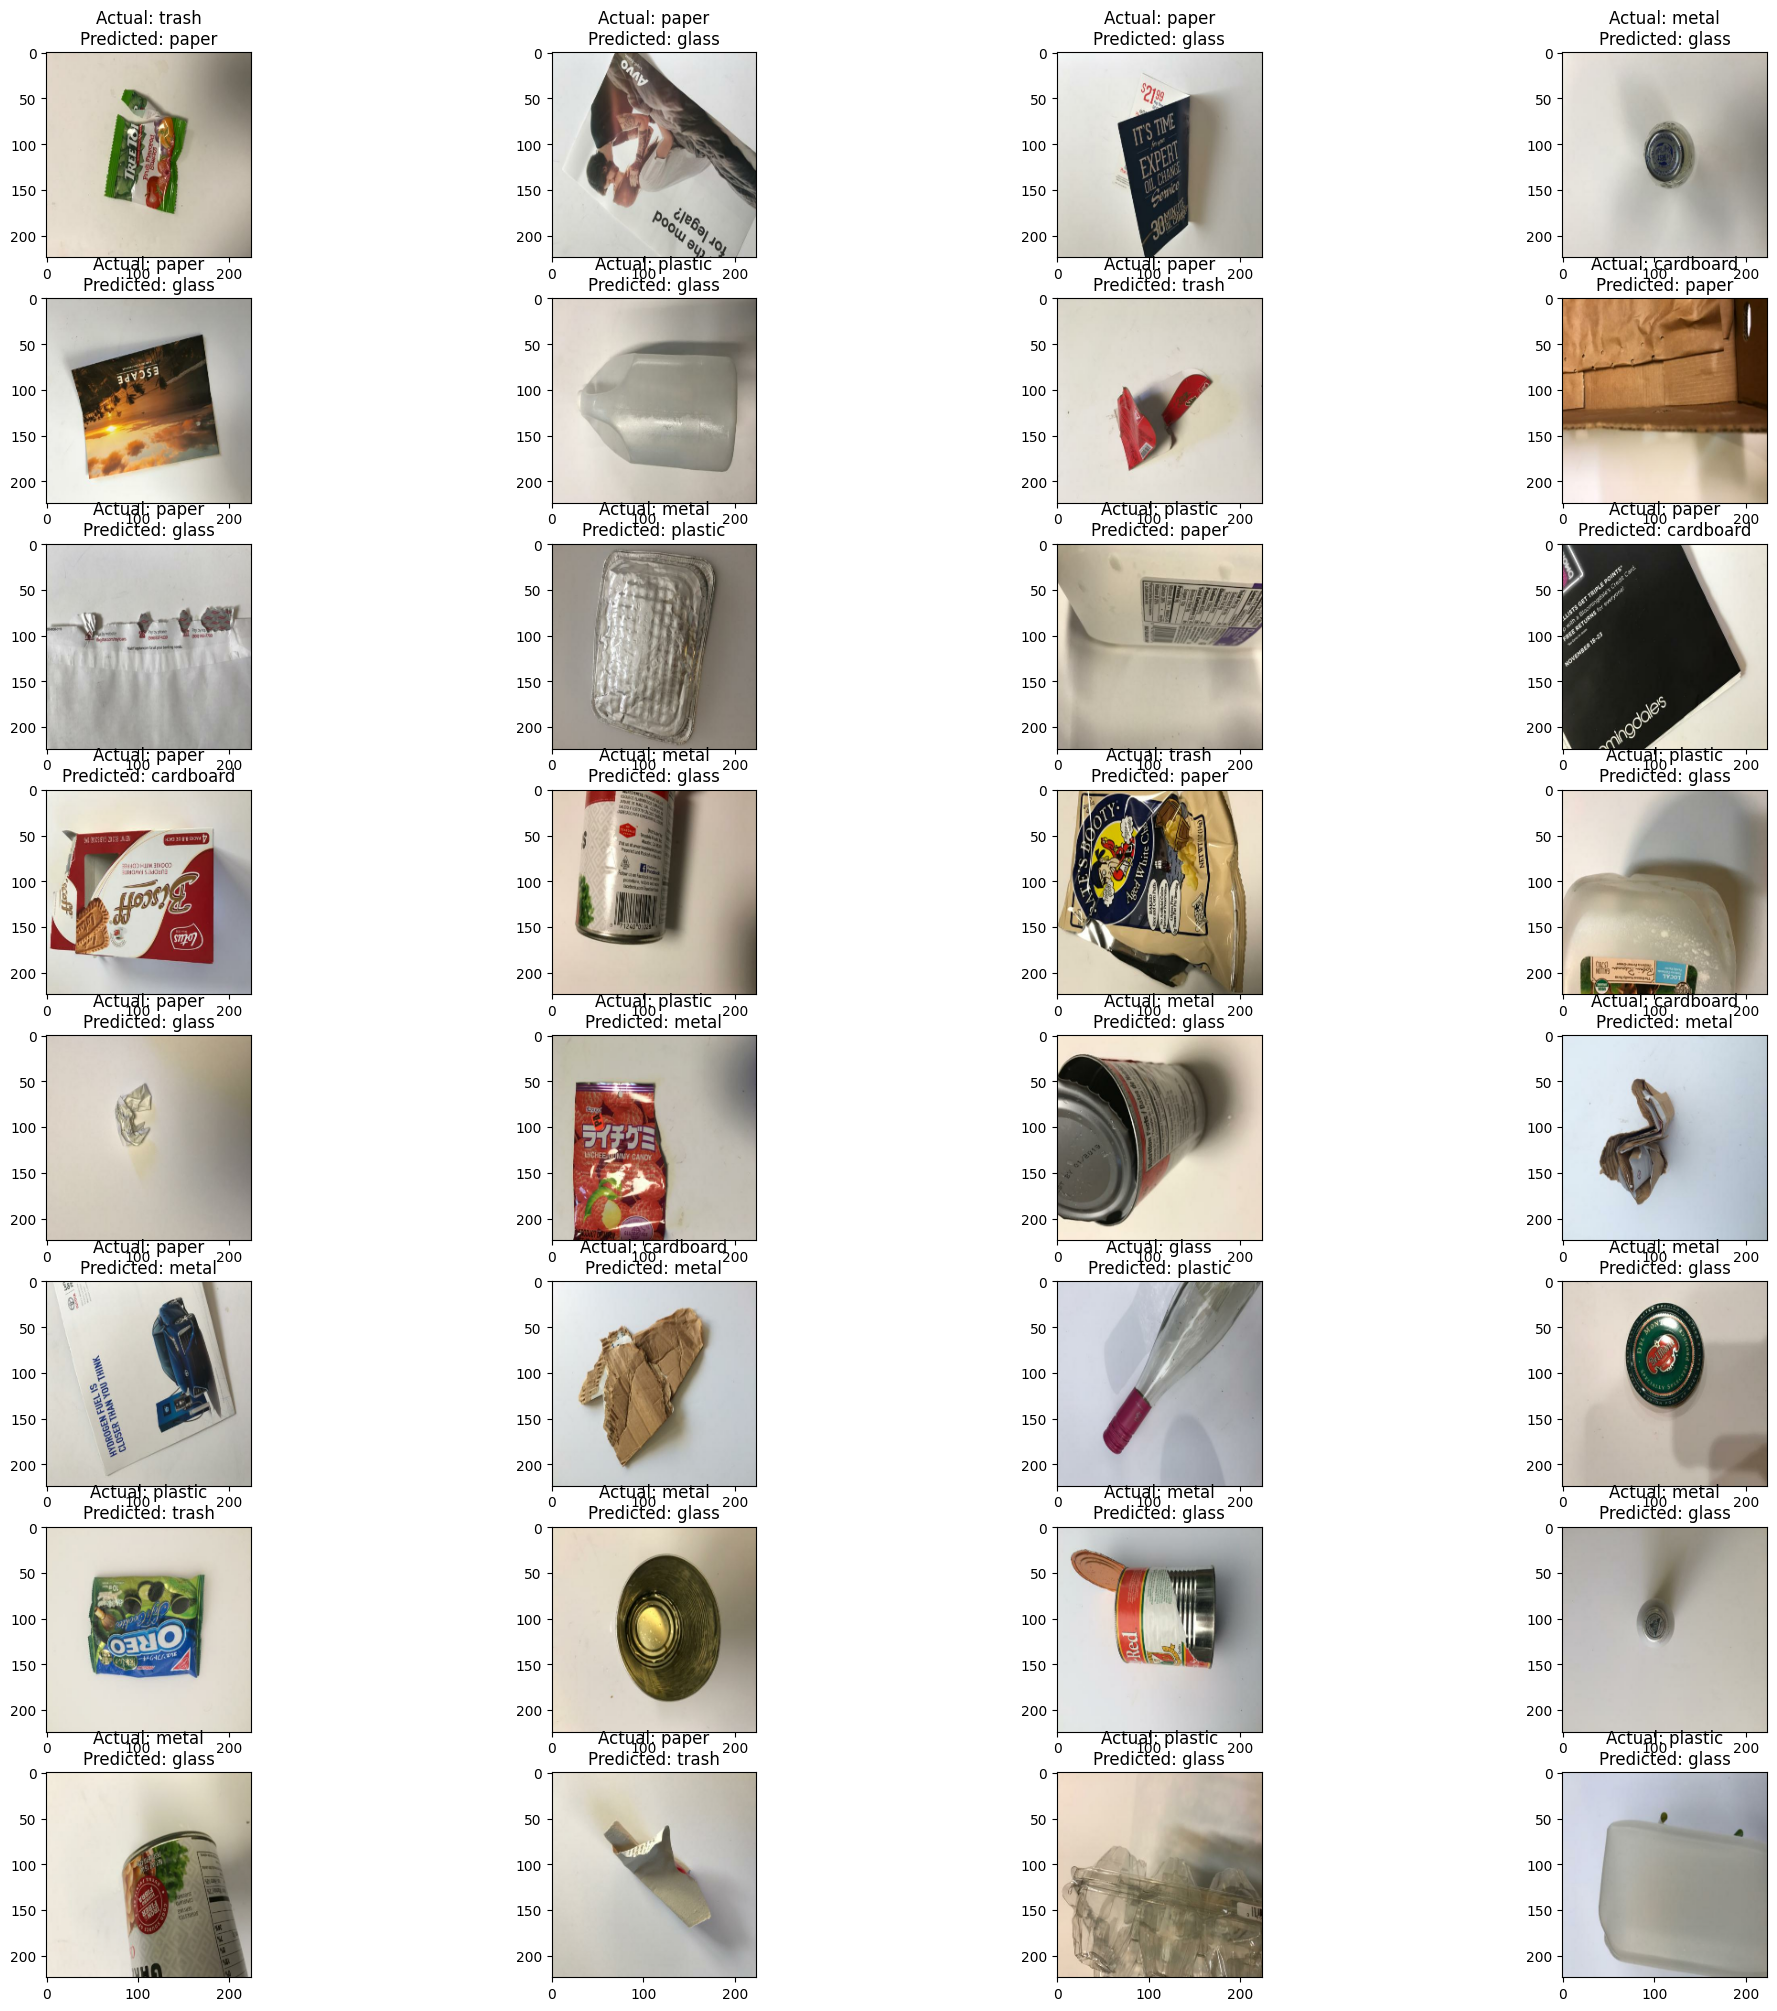

In [34]:
plt.figure(figsize=(25, 25))
plot_count = 1  # Counter to keep track of the number of plotted images
for i in range(len(X_val)):
    if class_names[y_val[i]] != class_names[y_pred[i]]:
        ax = plt.subplot(8, 4, plot_count)
        plt.imshow(X_val[i].astype("uint8"))
        ax.title.set_text(f"Actual: {class_names[y_val[i]]}\nPredicted: {class_names[y_pred[i]]}")
        plot_count += 1
        if plot_count > 32:
plt.show()

In [27]:
# prompt: give me the accuracy of each class

from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_val, y_pred)

# Print the accuracy for each class
print(report)


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.60      0.96      0.74        28
           2       0.88      0.77      0.82        39
           3       0.91      0.79      0.85        53
           4       0.96      0.85      0.90        54
           5       0.73      0.80      0.76        10

    accuracy                           0.85       224
   macro avg       0.83      0.85      0.83       224
weighted avg       0.87      0.85      0.85       224



In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

# Convert y_val and y_pred to NumPy arrays if they are not already
y_val = np.array(y_val)
y_pred = np.array(y_pred)

# Calculate the accuracy for each class
class_accuracies = {}
unique_labels = np.unique(y_val)
for label in unique_labels:
    indices = np.where(y_val == label)[0]  # Get indices where y_val equals the current label
    class_accuracies[label] = accuracy_score(y_val[indices], y_pred[indices])

# Print the accuracy for each class
for label, accuracy in class_accuracies.items():
    print(f"Accuracy for class {label}: {accuracy:.3f}")


Accuracy for class 0: 0.925
Accuracy for class 1: 0.964
Accuracy for class 2: 0.769
Accuracy for class 3: 0.792
Accuracy for class 4: 0.852
Accuracy for class 5: 0.800


In [29]:
# prompt: give me the precision of the completer model

from sklearn.metrics import  precision_score

# Calculate precision for each class
precision = precision_score(y_val, y_pred, average='weighted')

# Print the precision
print(f"Precision: {precision:.3f}")


Precision: 0.873


In [30]:
# prompt: give me the precision of the completer model

from sklearn.metrics import  recall_score

# Calculate precision for each class
recall = recall_score(y_val, y_pred, average='weighted')

# Print the precision
print(f"recall: {recall:.3f}")


recall: 0.848


In [31]:
from sklearn.metrics import f1_score

# Calculate F1-score for each class
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1-score
print(f"F1-score: {f1:.3f}")


F1-score: 0.853


In [32]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 84.821%


In [35]:
# prompt: save the model in to my drive

keras_model.save('/content/drive/MyDrive/models/dense121model.h5')
